# **Exploratory Data Analysis**

In [ ]:
# Importing the necessary libraries for data analysis and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/ParisHousing.csv")
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [ ]:
df.shape

(10000, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0


In [ ]:
df.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [ ]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [ ]:
# Obtain the unique values in each categorical features in the dataset
obj = [col for col in df.columns if df[col].nunique() <= 15 and df[col].dtype in ['int64']]
for col in obj:
  print(f"====={col}=====")
  unique_values = df[col].unique()
  n_unique_values = df[col].nunique()

  print(f"Unique values in {col}: {unique_values}")
  print(f"Number of unique values in {col}: {n_unique_values}\n")

=====hasYard=====
Unique values in hasYard: [0 1]
Number of unique values in hasYard: 2

=====hasPool=====
Unique values in hasPool: [1 0]
Number of unique values in hasPool: 2

=====cityPartRange=====
Unique values in cityPartRange: [ 3  8  6 10  5  4  2  7  9  1]
Number of unique values in cityPartRange: 10

=====numPrevOwners=====
Unique values in numPrevOwners: [ 8  6  4  7  9  3  2  5  1 10]
Number of unique values in numPrevOwners: 10

=====isNewBuilt=====
Unique values in isNewBuilt: [0 1]
Number of unique values in isNewBuilt: 2

=====hasStormProtector=====
Unique values in hasStormProtector: [1 0]
Number of unique values in hasStormProtector: 2

=====hasStorageRoom=====
Unique values in hasStorageRoom: [0 1]
Number of unique values in hasStorageRoom: 2

=====hasGuestRoom=====
Unique values in hasGuestRoom: [ 7  2  9  3  4  1  5 10  0  8  6]
Number of unique values in hasGuestRoom: 11



## Data Visualization

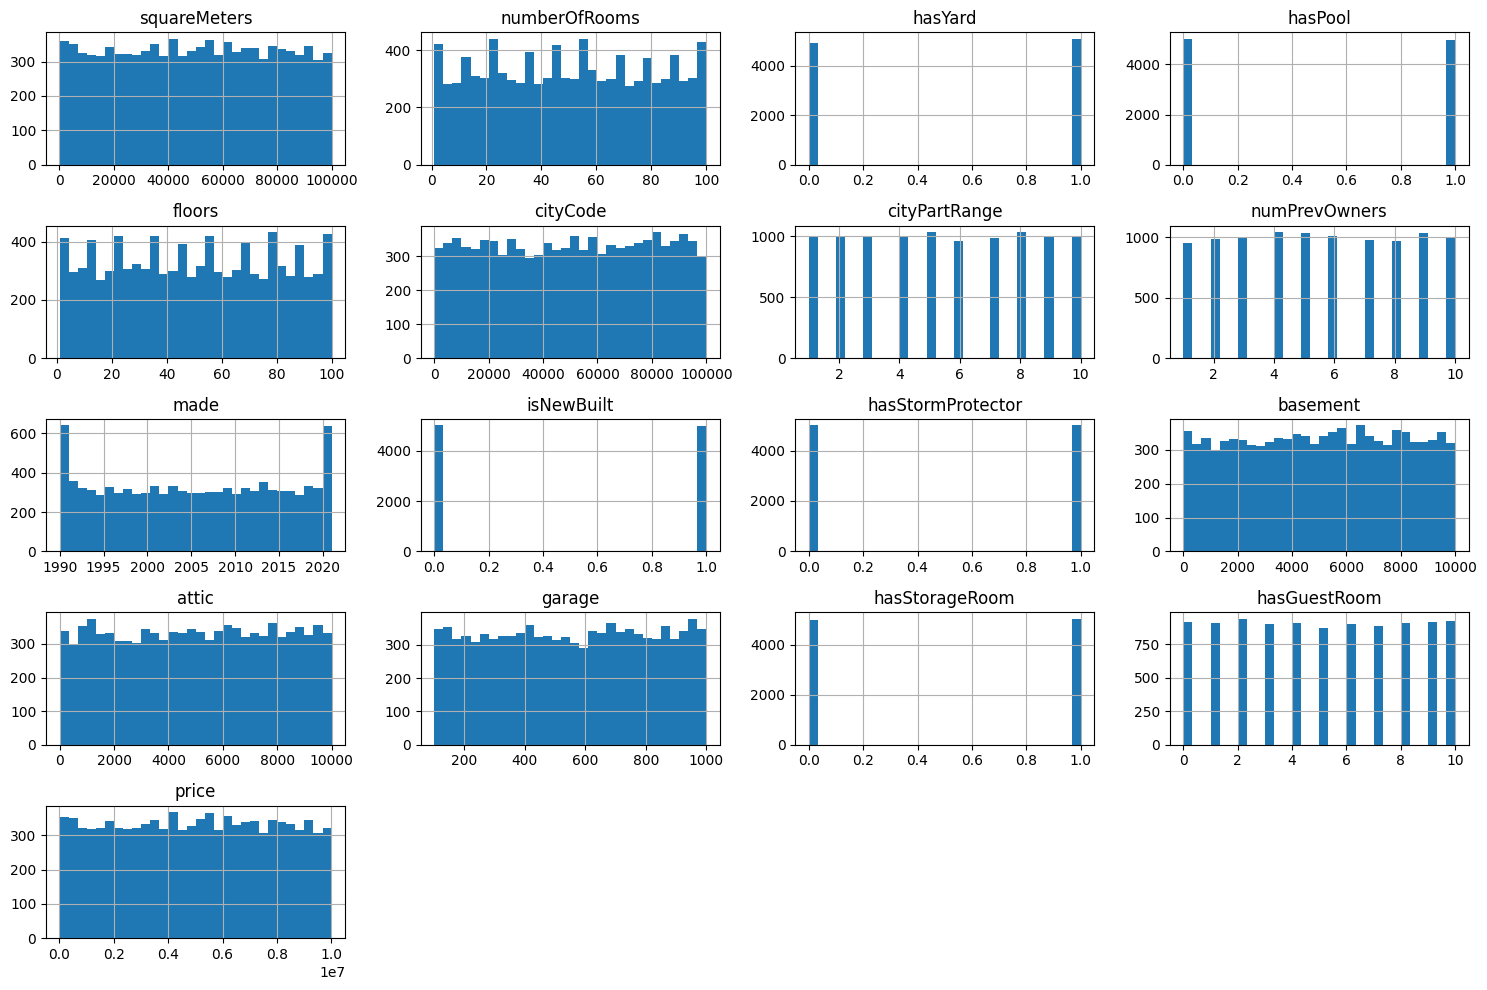

In [ ]:
# Histogram for each feature
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


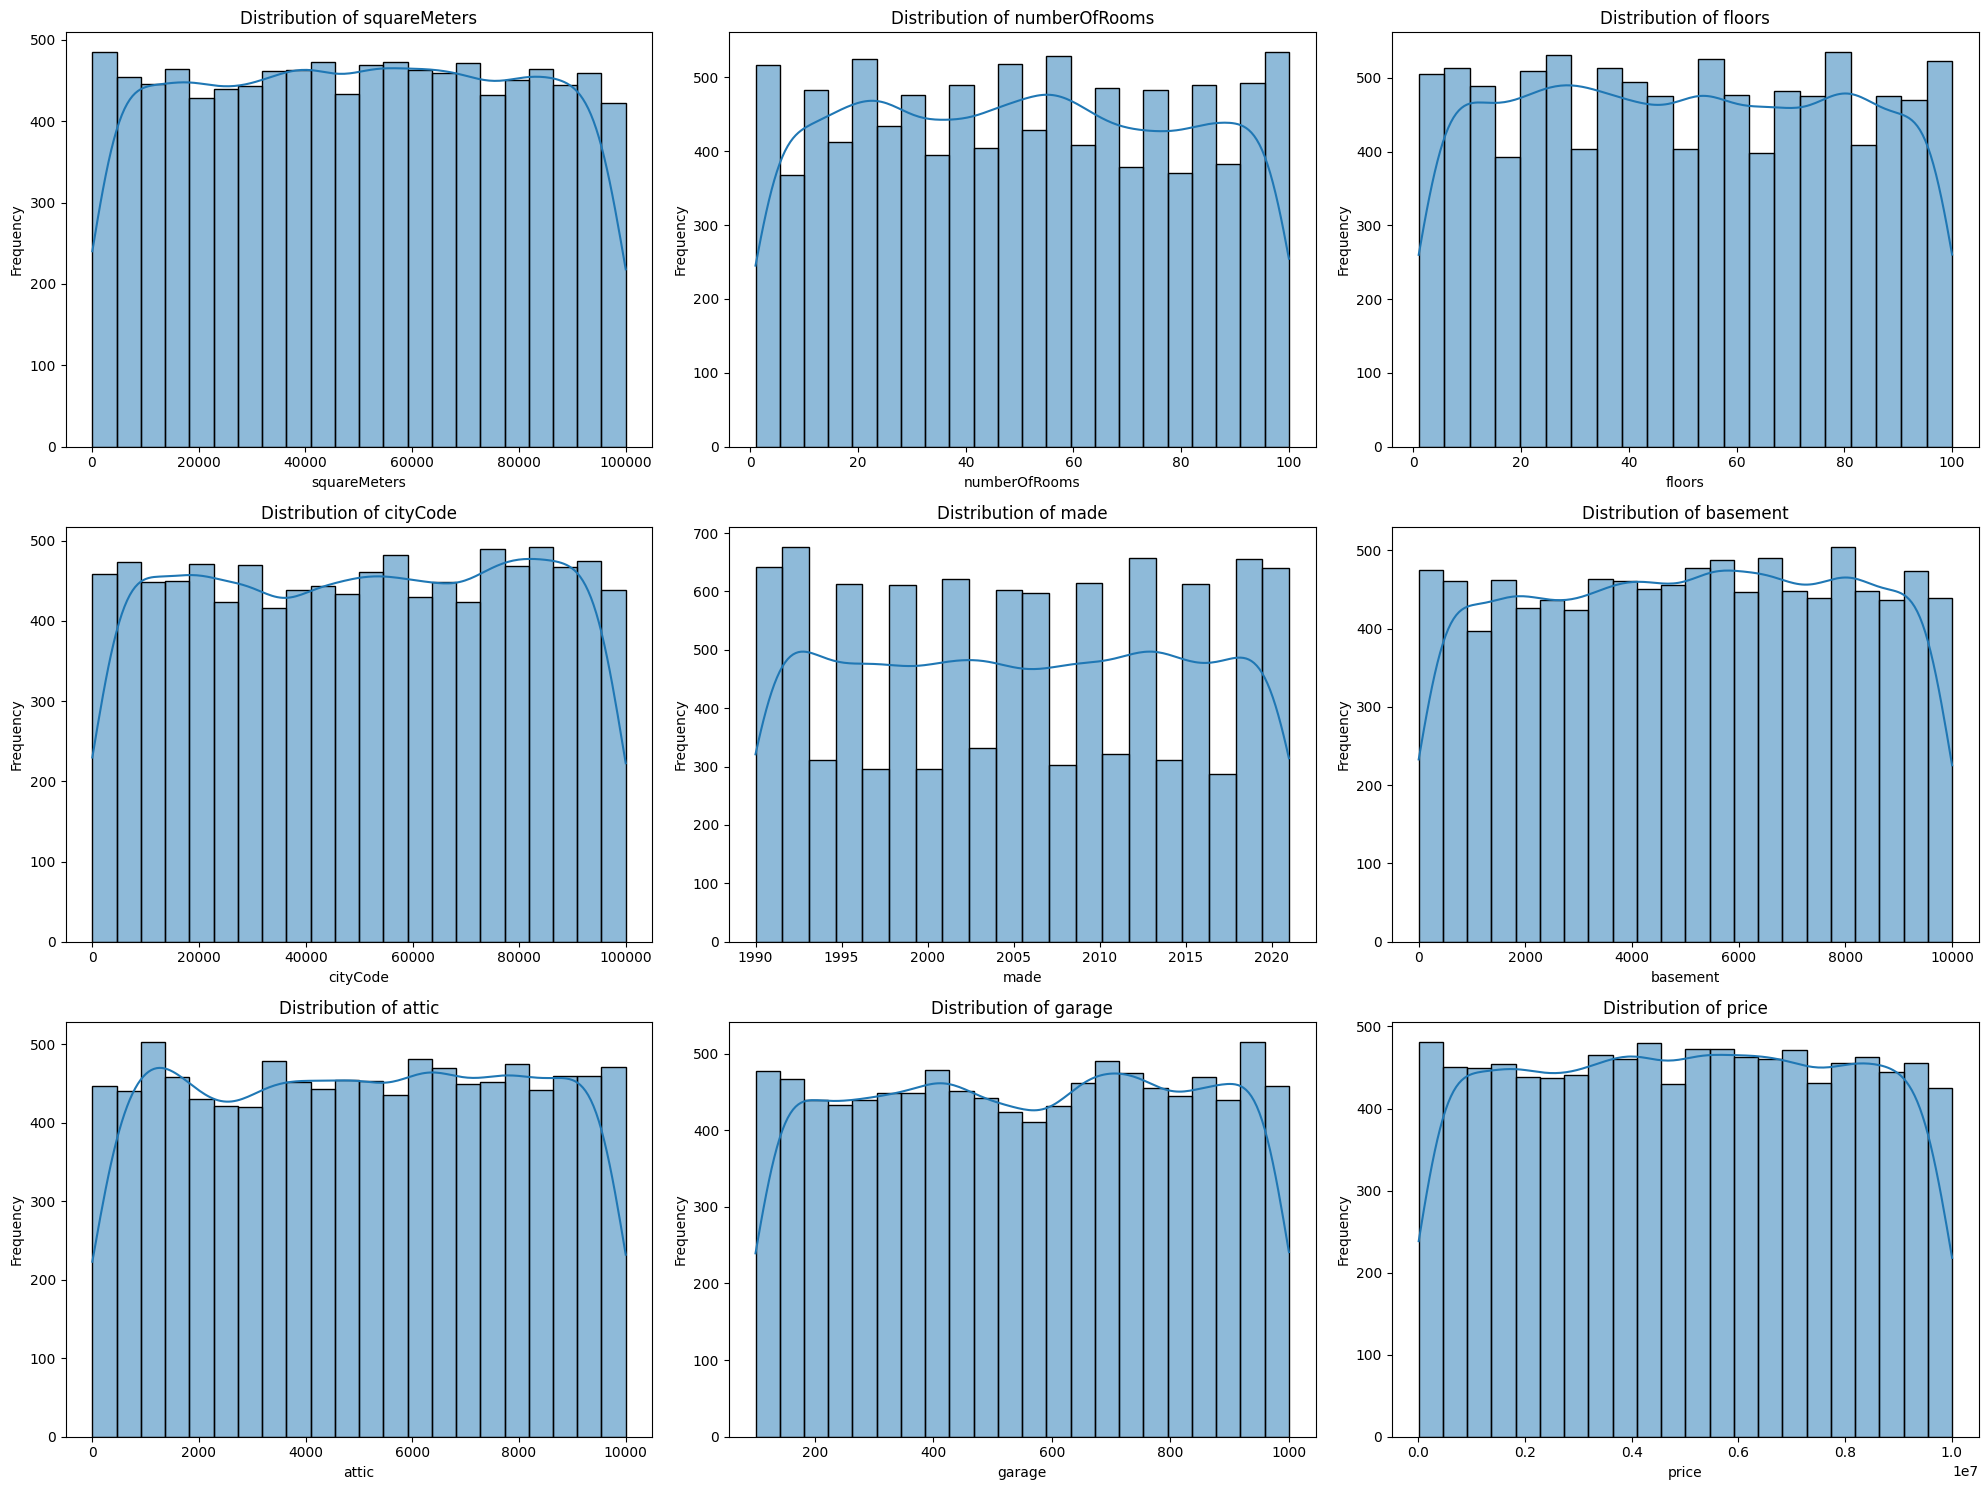

In [ ]:
# Identify continuous variables with 15 or more unique values
continuous_vars = [col for col in df.columns if df[col].nunique() >= 15]

# Create histograms with KDE for each continuous variable
plt.figure(figsize=(20, 15))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Countplot for the categorical features with two unique values (0 and 1)

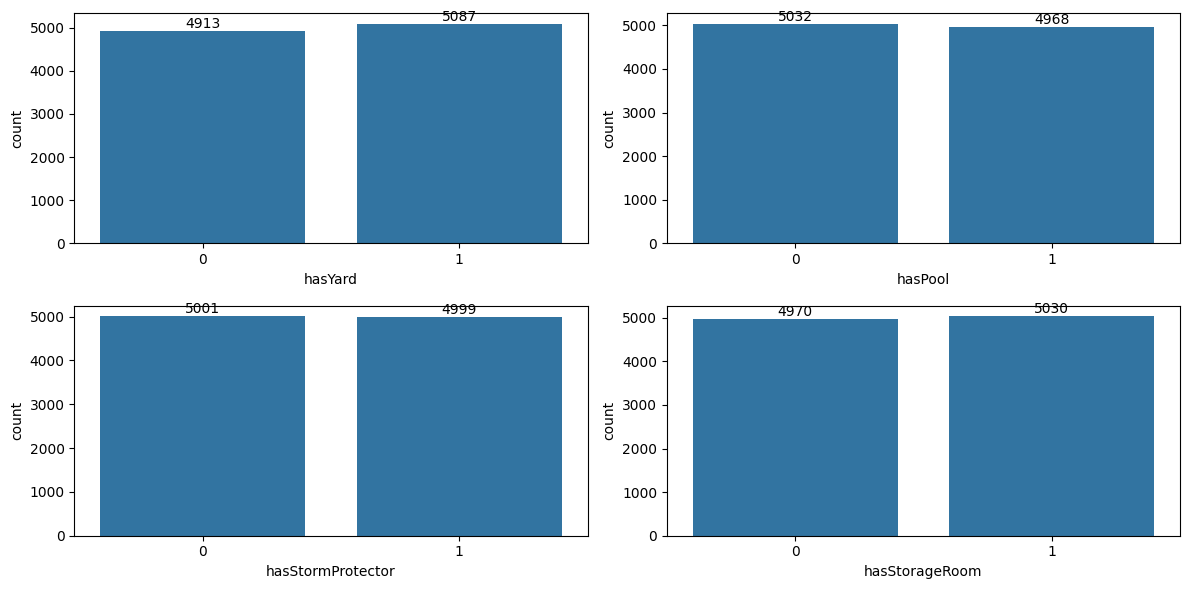

In [ ]:
# Creating countplot for the categorical features with two unique values (0 and 1)
count_var = ['hasYard', 'hasPool', 'hasStormProtector', 'hasStorageRoom']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(count_var):
    ax = sns.countplot(x=df[col], ax=axes[i])
    for j in ax.patches:
        ax.text(j.get_x() + j.get_width() / 2., j.get_height(),
                f'{int(j.get_height())}',
                ha="center", va="bottom")

plt.tight_layout()
plt.show()

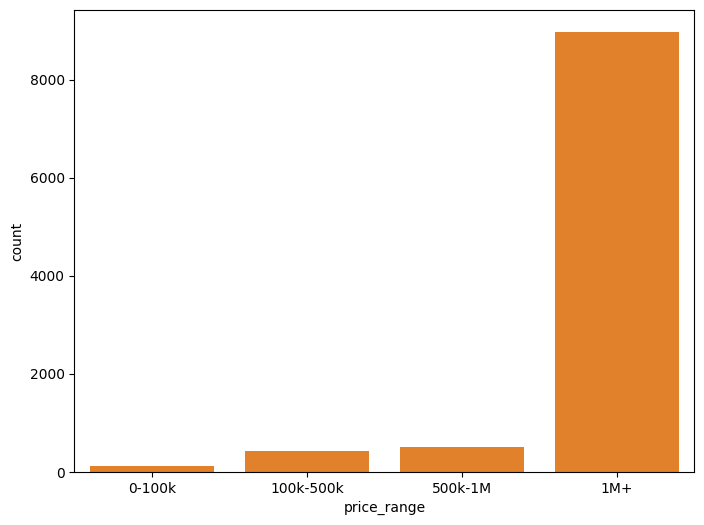

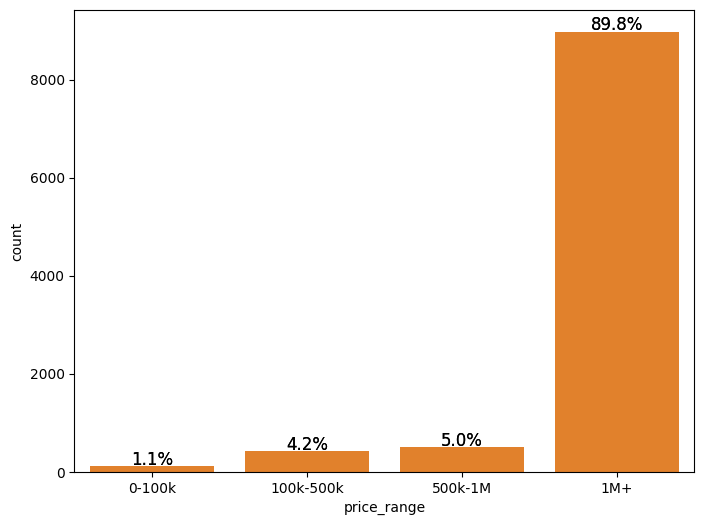

In [ ]:
# Binning the price feature
plt.figure(figsize=(8,6))
df_c = df.copy()
bins = [0, 100000, 500000, 1000000, df_c['price'].max()]
labels = ['0-100k', '100k-500k', '500k-1M', '1M+']
df_c['price_range'] = pd.cut(df_c['price'], bins=bins, labels=labels, right=False)
sns.countplot(x='price_range', data=df_c)

# Create the countplot
ax = sns.countplot(x='price_range', data=df_c)
plt.figure(figsize=(8,6))
df_c = df.copy()
bins = [0, 100000, 500000, 1000000, df_c['price'].max()]
labels = ['0-100k', '100k-500k', '500k-1M', '1M+']
df_c['price_range'] = pd.cut(df_c['price'], bins=bins, labels=labels, right=False)
sns.countplot(x='price_range', data=df_c)

# Create the countplot
ax = sns.countplot(x='price_range', data=df_c)

# Calculate the percentage and annotate
total = len(df_c)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.show()

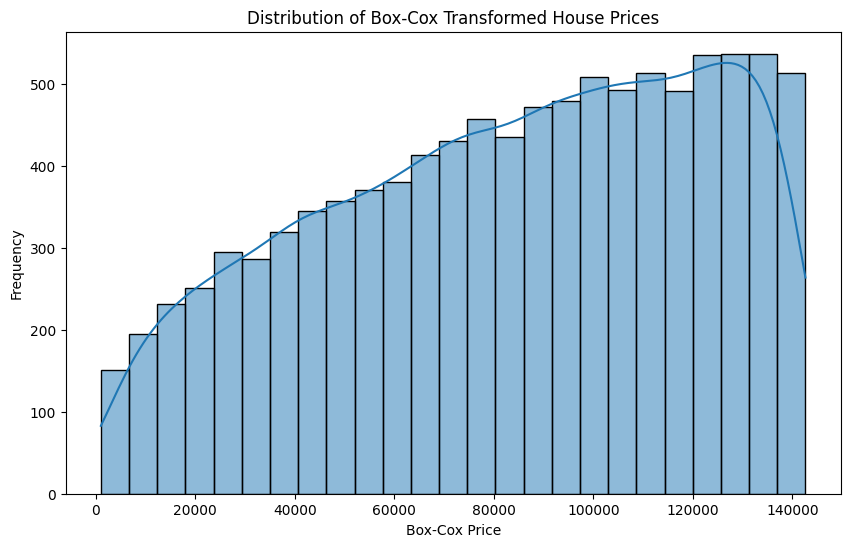

In [ ]:
from scipy import stats
# Apply Box-Cox transformation to the price column
df_c['boxcox_price'], fitted_lambda = stats.boxcox(df_c['price'])

# Plot the Box-Cox transformed price
plt.figure(figsize=(10, 6))
sns.histplot(df_c['boxcox_price'], kde=True)
plt.title('Distribution of Box-Cox Transformed House Prices')
plt.xlabel('Box-Cox Price')
plt.ylabel('Frequency')
plt.show()



In [ ]:
df_c.drop(columns=['price_range', 'price'], inplace=True)
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


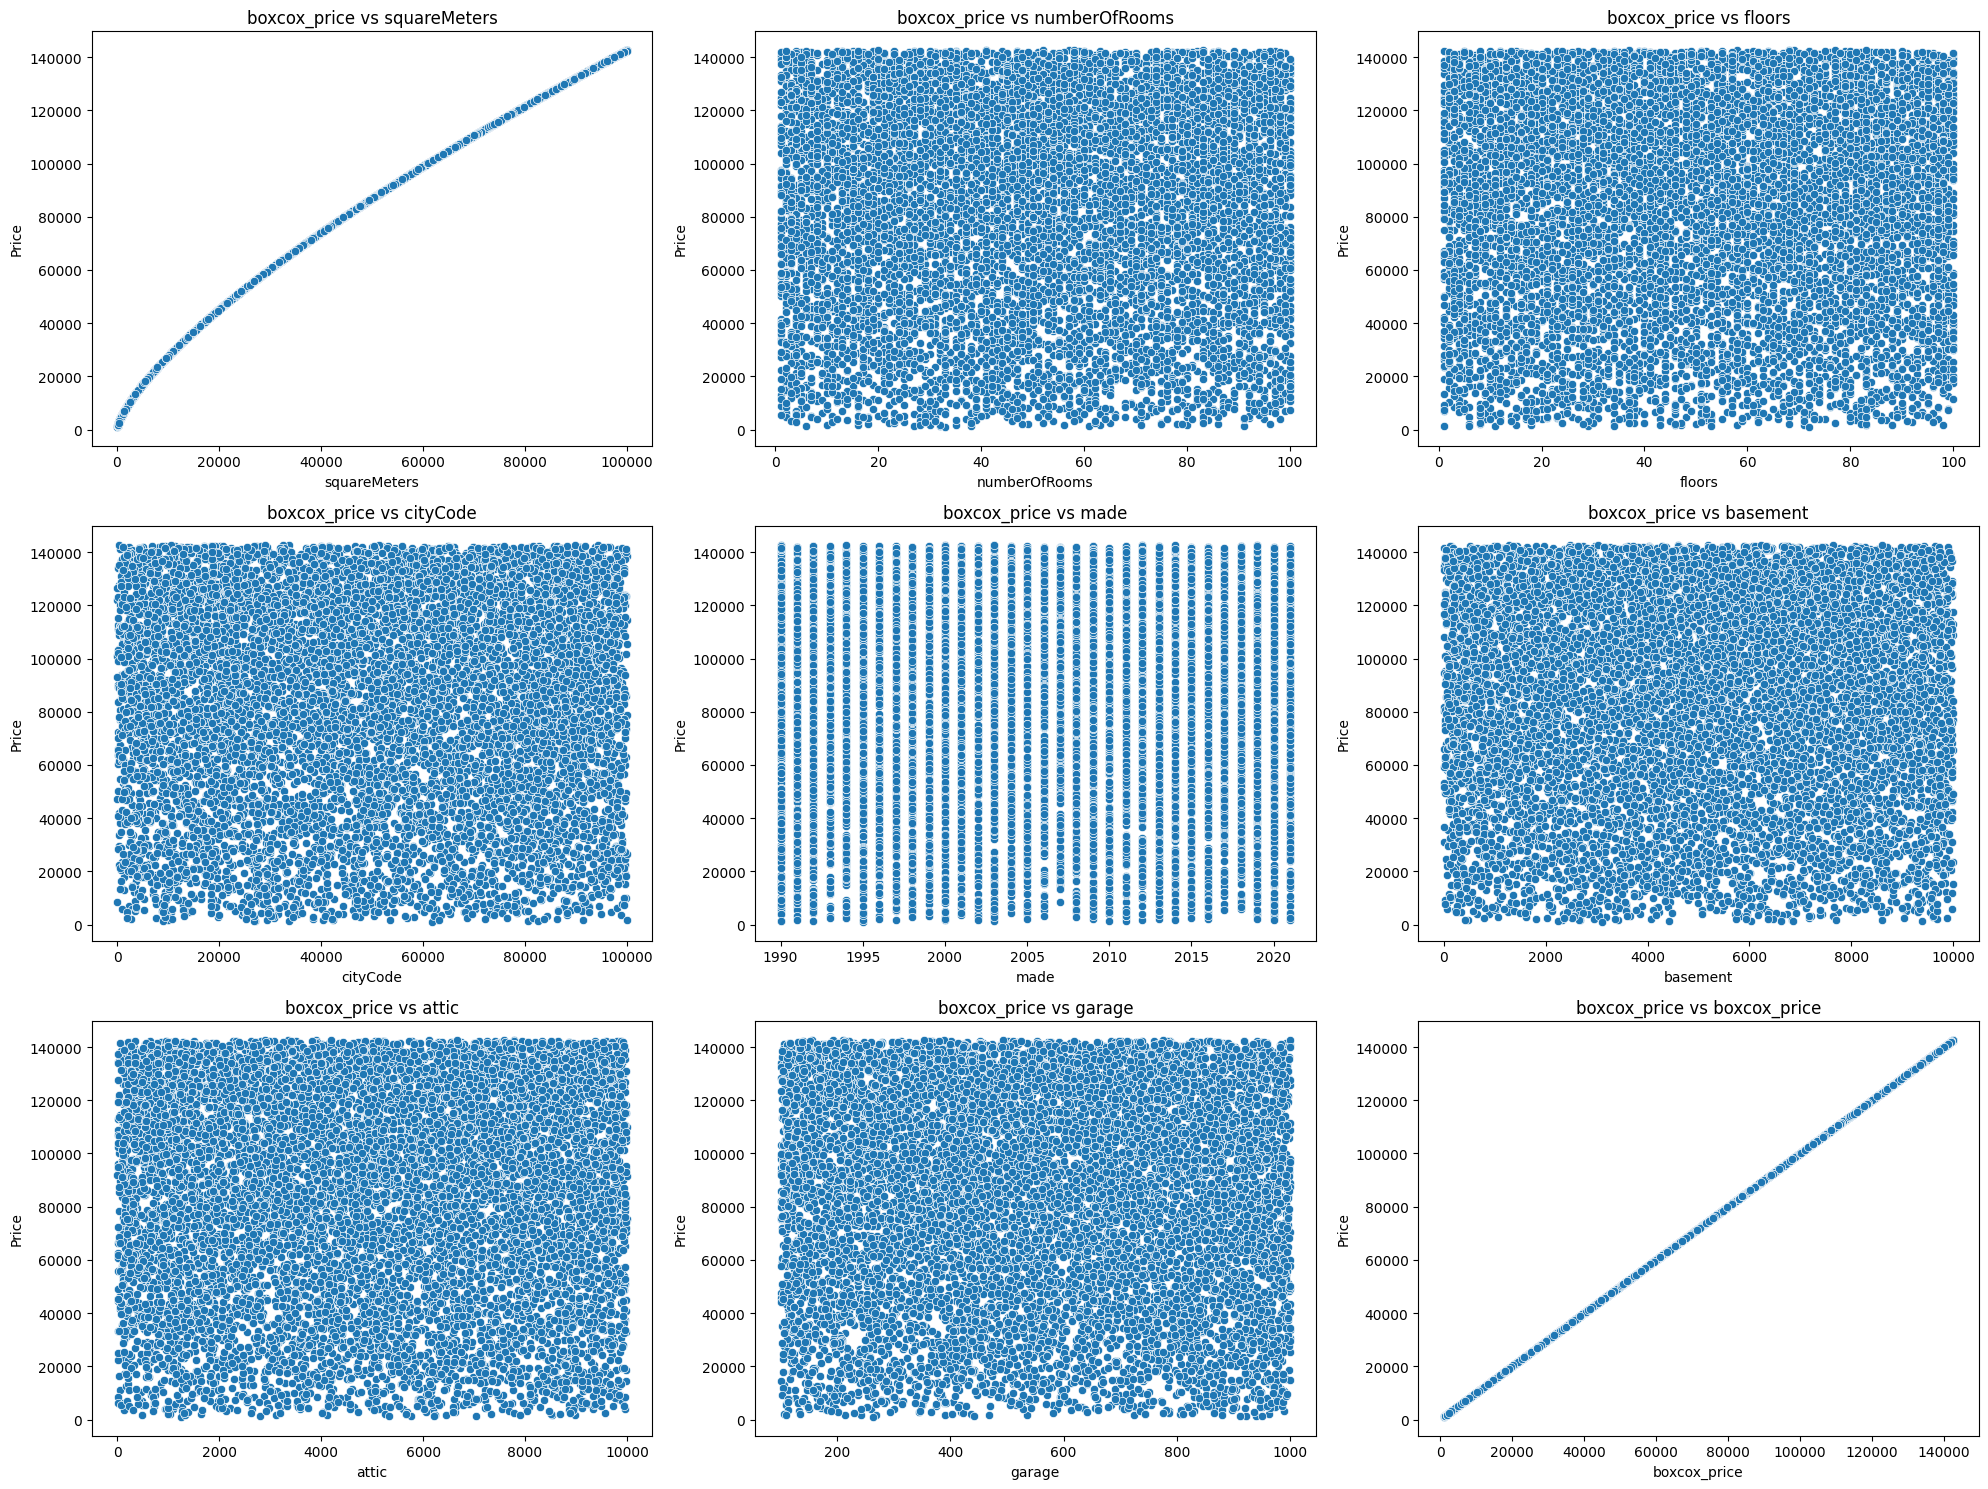

In [ ]:
# Identify continuous variables with 15 or more unique values
continuous_vars = [col for col in df_c.columns if df_c[col].nunique() >= 15]

# Create histograms with KDE for each continuous variable
plt.figure(figsize=(20, 15))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df_c[var], y=df_c['boxcox_price'])
    plt.title(f'boxcox_price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


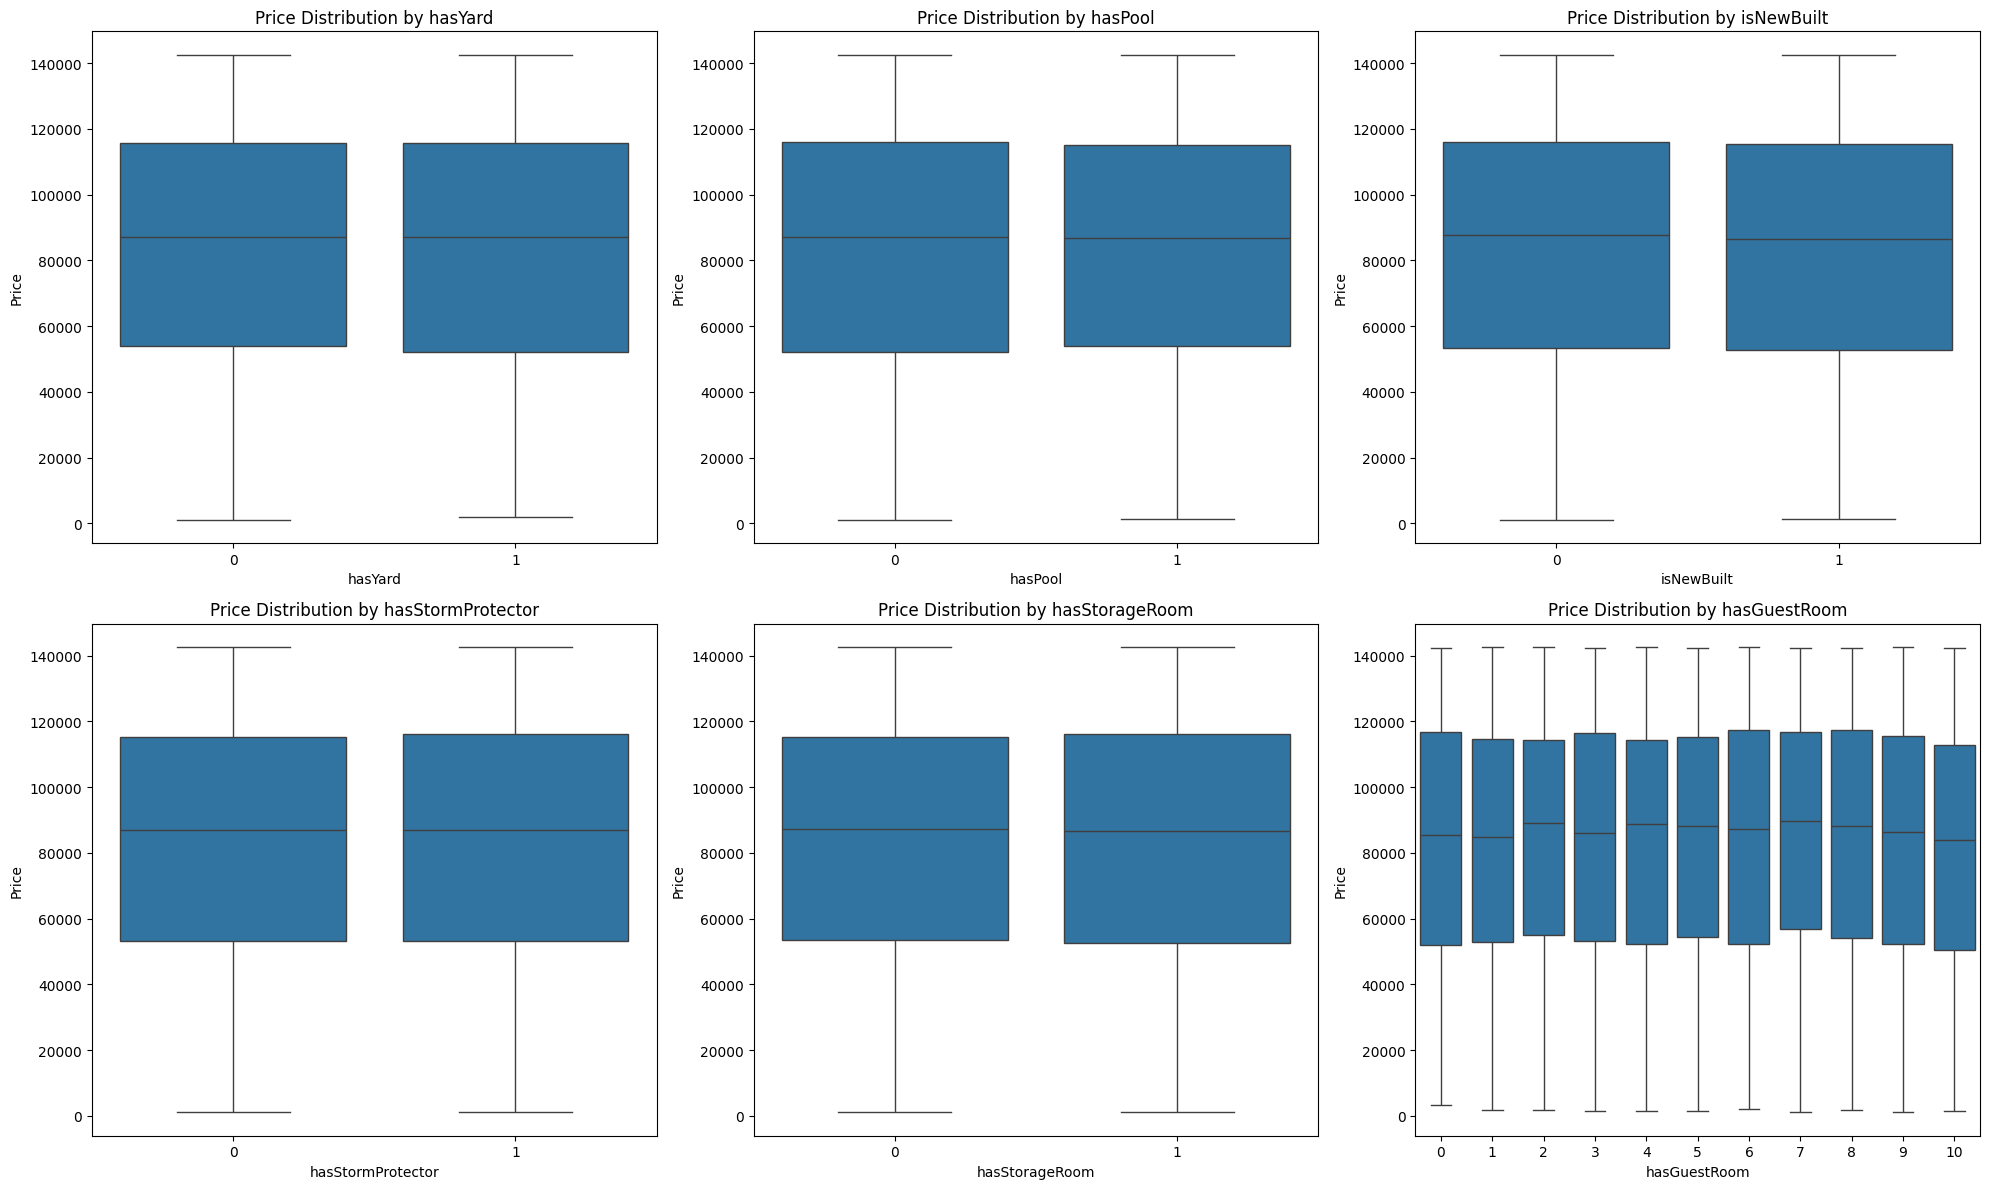

In [ ]:
# List of categorical variables
categorical_vars = ['hasYard', 'hasPool', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom', 'hasGuestRoom']

# Create boxplots for each categorical variable
plt.figure(figsize=(20, 12))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=var, y='boxcox_price', data=df_c)
    plt.title(f'Price Distribution by {var}')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


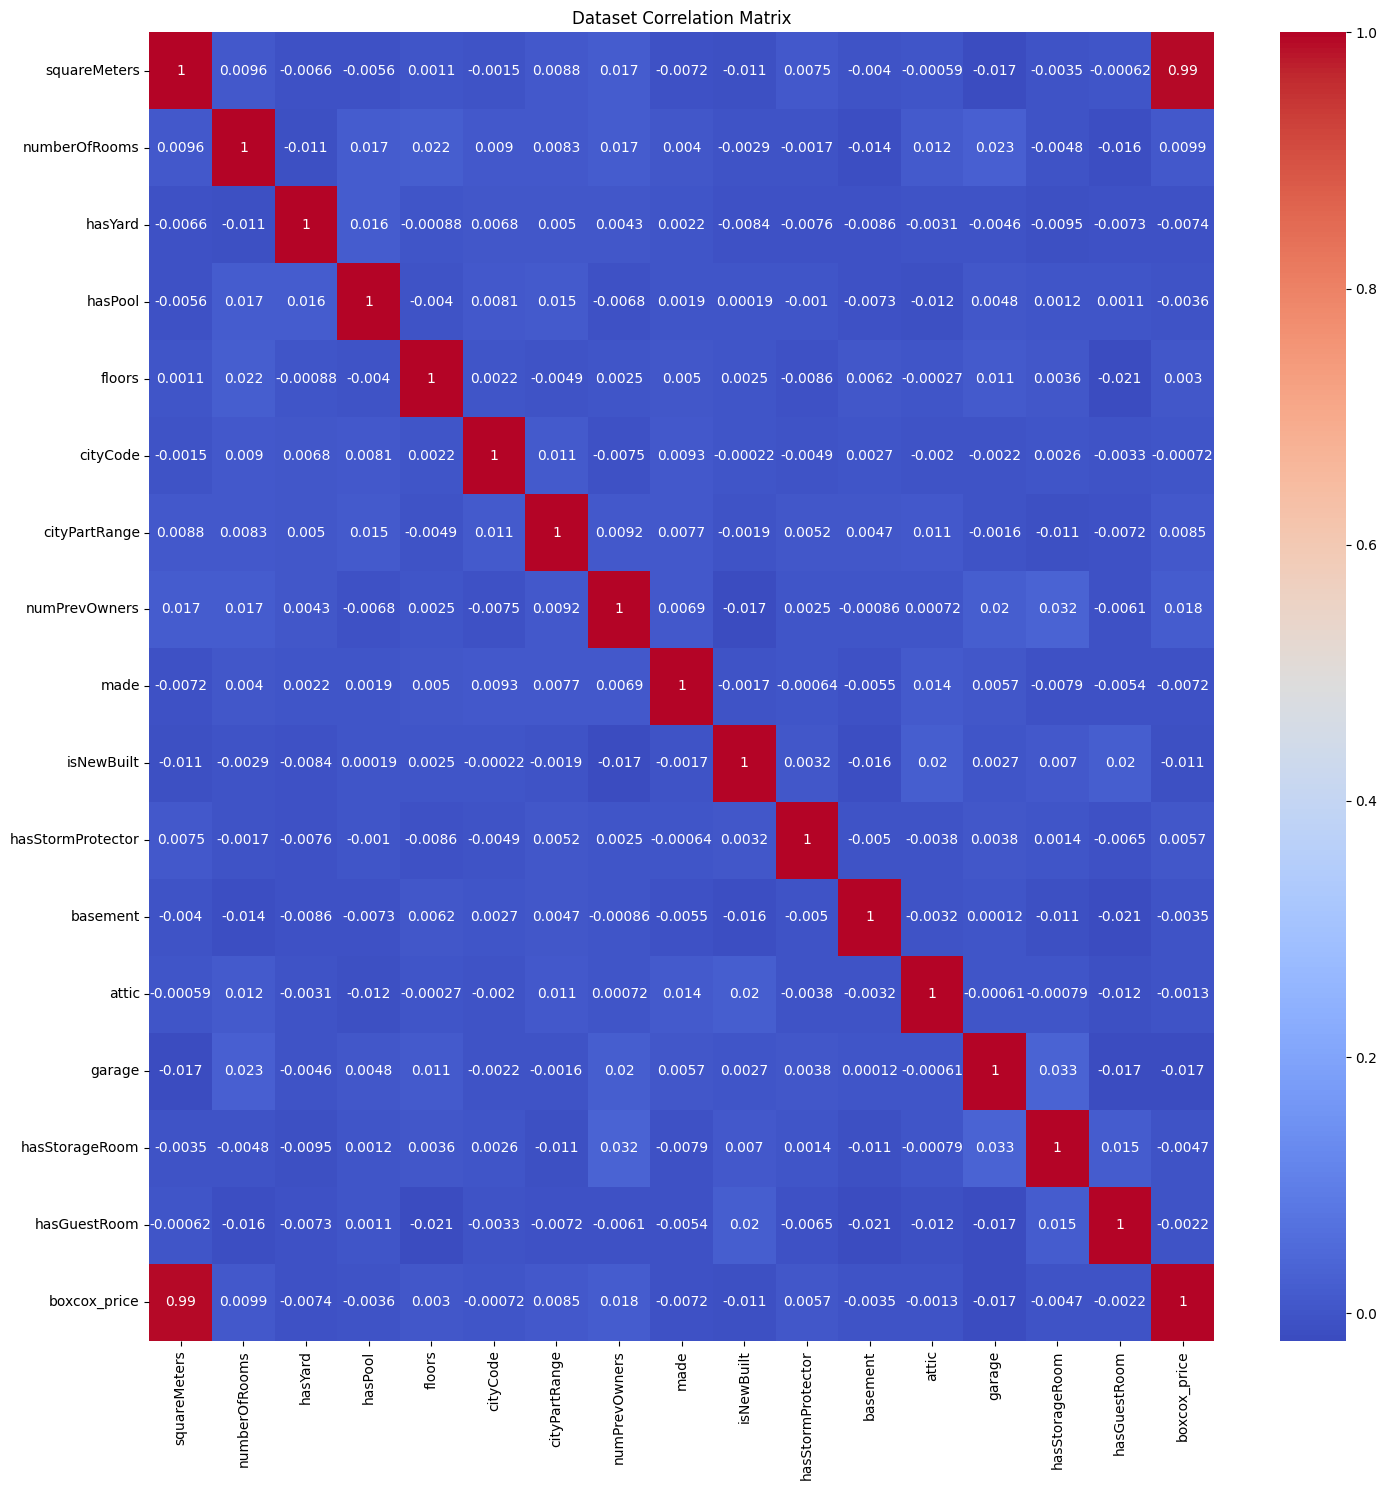

In [ ]:
# Creating heatmap for the dataset
plt.figure(figsize=(15, 15))
sns.heatmap(df_c.corr(), annot=True, cmap='coolwarm')
plt.title('Dataset Correlation Matrix')
plt.tight_layout()
plt.show()

#MACHINE LEARNING

In [ ]:
# Importing the necessary libraries needed for machine learing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

## Feature Engineering

In [ ]:
import datetime
#Feature Engineering
current_year = datetime.datetime.now().year
df_c['property_age'] = current_year - df_c['made']
df_c['house_to_room_ratio'] = df_c['squareMeters'] / df_c['numberOfRooms']
df_c['area_rooms_interaction'] = df_c['squareMeters'] * df_c['numberOfRooms']
df_c['basement_attic_interaction'] = df_c['basement'] * df_c['attic']
df_c['garage_floors_interaction'] = df_c['garage'] * df_c['floors']

In [ ]:
df_c.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,...,attic,garage,hasStorageRoom,hasGuestRoom,boxcox_price,property_age,house_to_room_ratio,area_rooms_interaction,basement_attic_interaction,garage_floors_interaction
0,75523,3,0,1,63,9373,3,8,2005,0,...,9005,956,0,7,116692.933791,19,25174.333333,226569,38838565,60228
1,80771,39,1,1,98,39381,8,6,2015,1,...,2436,128,1,2,122457.061859,9,2071.051282,3150069,8898708,12544
2,55712,58,0,1,19,34457,6,8,2021,0,...,8852,135,1,9,93845.734648,3,960.551724,3231296,25998324,2565
3,32316,47,0,0,6,27939,10,4,2012,0,...,7141,359,0,3,63543.271253,12,687.574468,1518852,4705919,2154
4,70429,19,1,1,90,38045,3,7,1990,1,...,2429,292,1,4,111071.097741,34,3706.789474,1338151,20488615,26280


## Train-test Split

In [ ]:
#Create features and targets
target = df_c['boxcox_price']
features = df_c.drop(columns=['boxcox_price'], axis=1)

#Split data
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=26)

## Feature Scaling

In [ ]:
#Feature Scaling
scaler = StandardScaler()

train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

In [ ]:
# Visualize the scaled dataframe
train_features_scaled_df = pd.DataFrame(train_features_scaled, columns=features.columns)
train_features_scaled_df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,...,basement,attic,garage,hasStorageRoom,hasGuestRoom,property_age,house_to_room_ratio,area_rooms_interaction,basement_attic_interaction,garage_floors_interaction
0,-1.611051,0.060926,0.980932,-0.989307,-1.603361,1.574178,-0.178897,1.562738,-0.159155,0.992776,...,1.448753,-0.021042,0.112653,-1.008789,0.627176,0.159155,-0.389403,-1.063267,0.924154,-1.152141
1,-1.645744,-0.877397,0.980932,-0.989307,-0.149960,0.147445,-0.872126,-0.183972,-1.663027,0.992776,...,-1.512252,1.059793,1.697851,0.991288,1.568470,1.663027,-0.385119,-1.114171,-0.891949,0.809621
2,0.172525,-1.676709,-1.019439,-0.989307,1.545674,0.133839,-1.565356,-0.533314,-0.373994,0.992776,...,-1.157920,0.348654,-1.529842,-1.008789,-0.627882,0.373994,3.993291,-1.089531,-0.677078,-0.613503
3,0.074626,-1.224924,0.980932,1.010808,-1.049684,-0.655118,-0.178897,-1.231999,-0.911091,0.992776,...,-0.393913,-1.120137,1.186004,0.991288,-0.000353,0.911091,0.156096,-0.785034,-0.827841,-0.479408
4,-0.734474,1.520539,0.980932,1.010808,0.369112,1.642793,0.514333,-0.533314,0.485361,0.992776,...,-0.899654,1.306143,0.341838,0.991288,0.313412,-0.485361,-0.350602,0.081285,-0.167518,0.505762


In [ ]:
train_features_scaled_df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'property_age', 'house_to_room_ratio',
       'area_rooms_interaction', 'basement_attic_interaction',
       'garage_floors_interaction'],
      dtype='object')

## Model Training

In [ ]:
# Linear Regression Algorithm
lin_reg = LinearRegression()
lin_reg.fit(train_features_scaled, train_target)
pred_target = lin_reg.predict(test_features_scaled)
lin_reg_RMSE = np.sqrt(mean_squared_error(test_target, pred_target))
lin_reg_MAE = mean_absolute_error(test_target, pred_target)
print("Linear Regression RMSE:", lin_reg_RMSE)
print("Linear Regression MAE:", lin_reg_MAE)
print("Linear Regression R^2:", r2_score(test_target, pred_target))

Linear Regression RMSE: 3934.2984943234105
Linear Regression MAE: 3232.885776130584
Linear Regression R^2: 0.9891039111828631


In [ ]:
# Evaluating the Linear Regression alorithm
scores = cross_val_score(lin_reg, features, target, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
print("Cross-validated RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())

Cross-validated RMSE scores: [3984.51184295 3982.03734767 4130.11680848 4062.32142073 4181.38007251
 3861.00246753 4035.87664749 4136.17883038 4004.4886219  3881.50732466]
Mean RMSE: 4025.94213842965
Standard Deviation of RMSE: 100.3785096548776


In [ ]:
lin_reg.intercept_

82646.30631149677

In [ ]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([train_features.columns, lin_reg.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,squareMeters,37878.797426
1,numberOfRooms,-56.595557
2,hasYard,-32.568567
3,hasPool,83.911396
4,floors,35.715894
5,cityCode,40.72681
6,cityPartRange,-9.49654
7,numPrevOwners,28.720648
8,made,-5.669952
9,isNewBuilt,-3.549437


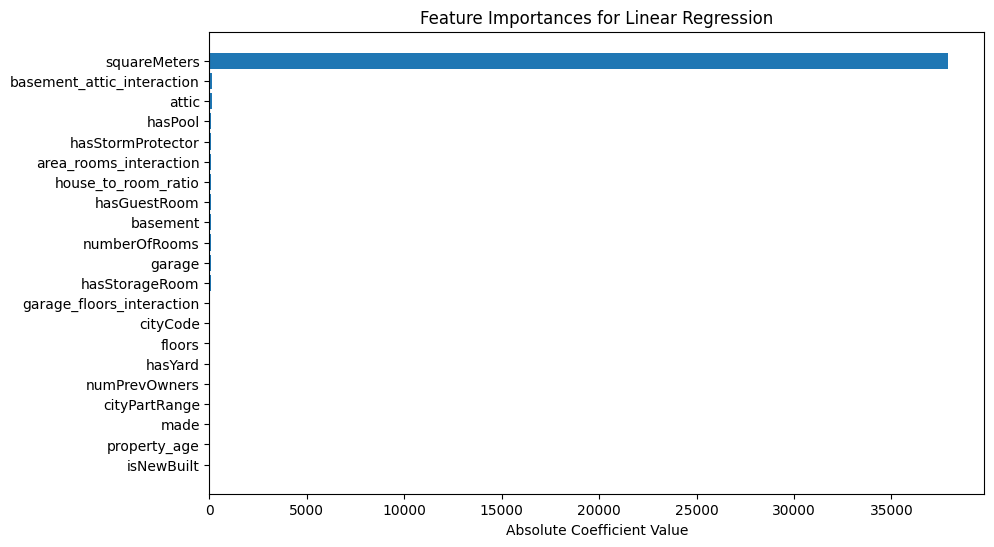

In [ ]:
# Plot feature importances (coefficients)
def plot_linear_feature_importances(model, feature_names):
    coefficients = model.coef_
    importance = np.abs(coefficients)
    indices = np.argsort(importance)

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances for Linear Regression")
    plt.barh(range(len(indices)), importance[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Absolute Coefficient Value')
    plt.show()

# Assuming X_train is a DataFrame with named columns
feature_names = train_features.columns if isinstance(train_features, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]
plot_linear_feature_importances(lin_reg, feature_names)


In [ ]:
# Gradient Boosting Regressor
gbr_reg = GradientBoostingRegressor(n_estimators=100, random_state=26)
gbr_reg.fit(train_features_scaled, train_target)
pred_target = gbr_reg.predict(test_features_scaled)
gbr_reg_RMSE = np.sqrt(mean_squared_error(test_target, pred_target))
gbr_reg_MAE = mean_absolute_error(test_target, pred_target)
print("Gradient Boosting RMSE:", gbr_reg_RMSE)
print("Gradient Boosting MAE:", gbr_reg_MAE)
print("Gradient Boosting R^2:", r2_score(test_target, pred_target))

Gradient Boosting RMSE: 290.465694603328
Gradient Boosting MAE: 220.6626538725323
Gradient Boosting R^2: 0.9999406083054966


In [ ]:
# XGB Regressor
xgb_reg = XGBRegressor(n_estimators=100, random_state=26)
xgb_reg.fit(train_features_scaled, train_target)
pred_target = xgb_reg.predict(test_features_scaled)
xgb_reg_RMSE = np.sqrt(mean_squared_error(test_target, pred_target))
xgb_reg_MAE = mean_absolute_error(test_target, pred_target)
print("XGBoost RMSE:", xgb_reg_RMSE)
print("XGBoost MAE:", xgb_reg_MAE)
print("XGBoost R^2:", r2_score(test_target, pred_target))

XGBoost RMSE: 211.16190529191613
XGBoost MAE: 165.83796075080406
XGBoost R^2: 0.999968611745504


In [ ]:
#RandomForest Regressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=26)
forest_reg.fit(train_features_scaled, train_target)
pred_target = forest_reg.predict(test_features_scaled)
rforest_RMSE = np.sqrt(mean_squared_error(test_target, pred_target))
rforest_MAE = mean_absolute_error(test_target, pred_target)
print("Random Forest RMSE:", rforest_RMSE)
print("Random Forest MAE:", rforest_MAE)
print("Random Forest R^2:", r2_score(test_target, pred_target))

Random Forest RMSE: 57.35379973394796
Random Forest MAE: 43.305220937789635
Random Forest R^2: 0.9999976844166806


## Model Evaluation

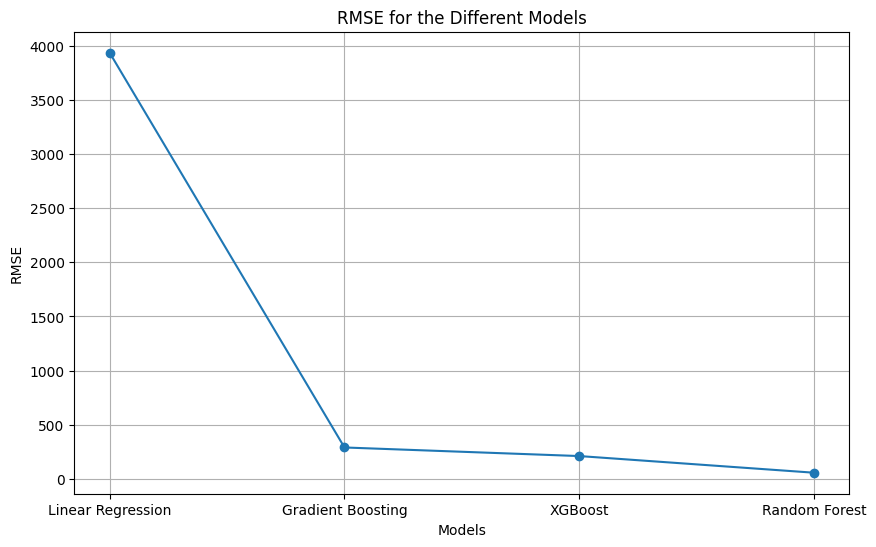

In [ ]:
# Plotting the RMSE of the various models
models_rmse = [lin_reg_RMSE, gbr_reg_RMSE, xgb_reg_RMSE, rforest_RMSE]
models_name = ['Linear Regression', 'Gradient Boosting', 'XGBoost', 'Random Forest']
plt.figure(figsize=(10, 6))
plt.plot(models_name, models_rmse, marker='o')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE for the Different Models')
plt.grid(True)
plt.show()

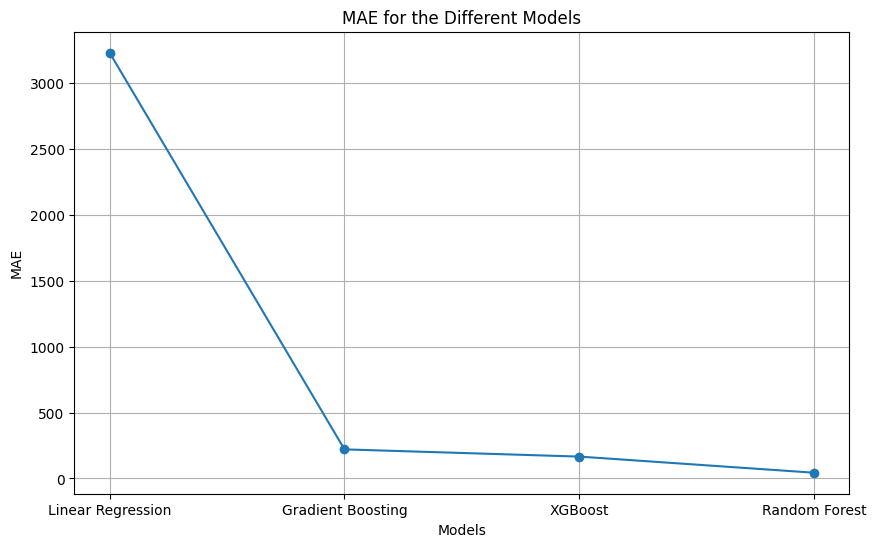

In [ ]:
# Plotting the MAE of the various models
models_mae = [lin_reg_MAE, gbr_reg_MAE, xgb_reg_MAE, rforest_MAE]
models_name = ['Linear Regression', 'Gradient Boosting', 'XGBoost', 'Random Forest']
plt.figure(figsize=(10, 6))
plt.plot(models_name, models_mae, marker='o')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE for the Different Models')
plt.grid(True)
plt.show()

In [ ]:
# Feature Importance
importances = forest_reg.feature_importances_
importances_df = pd.DataFrame({"features": train_features.columns, "importances": importances})
importances_df = importances_df.sort_values(by="importances", ascending=False)
importances_df

,features,importances
0,squareMeters,9.999984e-01
4,floors,1.377994e-07
5,cityCode,1.275748e-07
12,attic,1.252391e-07
13,garage,1.157483e-07
20,garage_floors_interaction,1.140060e-07
11,basement,1.090029e-07
19,basement_attic_interaction,1.047358e-07
15,hasGuestRoom,8.598401e-08
6,cityPartRange,8.260789e-08


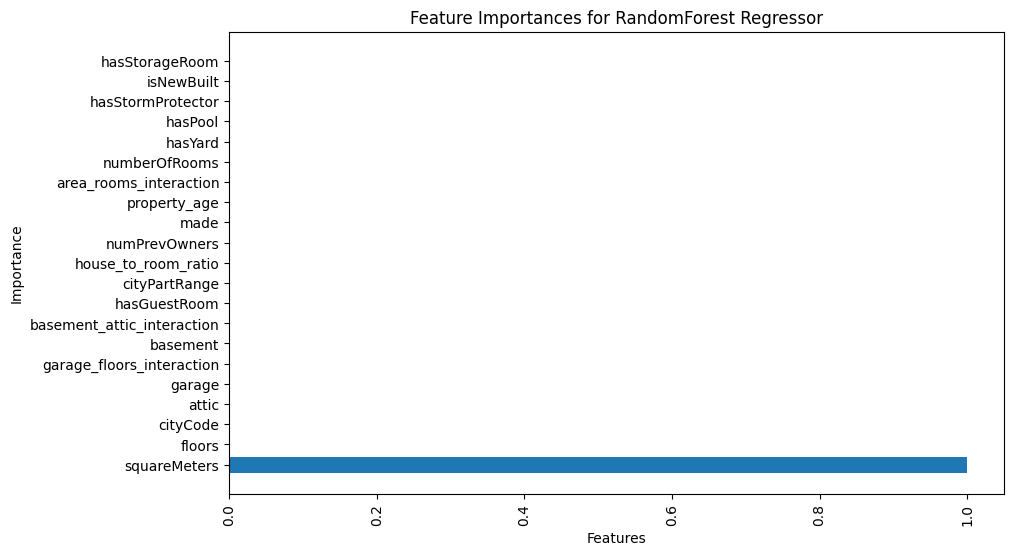

In [ ]:
#Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df["features"], importances_df["importances"])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances for RandomForest Regressor")
plt.xticks(rotation=90)
plt.show()

## Hyper Parameter Tuning



In [ ]:
# Define the parameter grids for each model
param_grids = {
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=26),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 4, 5],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=26),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, 30]
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(random_state=26),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 4, 5],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

# Iterate over the models and their parameter grids
for model_name, model_info in param_grids.items():
    print(f"Training {model_name}...")

    grid_search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    grid_search.fit(train_features, train_target)

    best_model = grid_search.best_estimator_
    pred_target = best_model.predict(test_features)

    print(f"Best parameters for {model_name}:", grid_search.best_params_)
    print(f"Tuned {model_name} RMSE:", np.sqrt(mean_squared_error(test_target, pred_target)))
    print(f"Tuned {model_name} MAE:", mean_absolute_error(test_target, pred_target))
    print(f"Tuned {model_name} R^2:", r2_score(test_target, pred_target))
    print("\n")


Training GradientBoostingRegressor...
Best parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Tuned GradientBoostingRegressor RMSE: 86.8543145920564
Tuned GradientBoostingRegressor MAE: 66.83786992244323
Tuned GradientBoostingRegressor R^2: 0.9999946897029424


Training RandomForestRegressor...
Best parameters for RandomForestRegressor: {'max_depth': 20, 'n_estimators': 300}
Tuned RandomForestRegressor RMSE: 57.13444519576984
Tuned RandomForestRegressor MAE: 43.01340440991787
Tuned RandomForestRegressor R^2: 0.9999977020951045


Training XGBRegressor...
Best parameters for XGBRegressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Tuned XGBRegressor RMSE: 177.88429750613147
Tuned XGBRegressor MAE: 144.78862053824454
Tuned XGBRegressor R^2: 0.999977725331605




# CONCLUSION

The Random Forest Regressor is the most suitable for predicting house prices in this dataset